# IMPORTANDO Y CARGANDO LAS LIBRERIAS

---





In [7]:
#IMPORTAMOS LAS LIBRERIAS
import pandas as pd
import numpy as np

In [8]:
#OBTENEMOS LOS DATOS
data = pd.read_csv("Daily Bike Sharing.csv", 
                    index_col="dteday", 
                    parse_dates=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
#SELECCIONAMOS LAS VARIABLES QUE CREEMOS RELEVANTES PARA NUESTRO MODELO
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head()

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


# TRANSFORMACIÓN DE LOS DATOS

In [10]:
#RENOMBRAMOS LA VARIABLE QUE QUEREMOS PRONOSTICAR
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [11]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [12]:
#Le decimos a python hey mi conjunto de datos es esta frecuencia diaria
# Esto es muy importante, cuando los modelos lean nuestra variable independiente, sabrán que hablamos de frecuencia diaria
data = data.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

# VISUALIZACIÓN

<AxesSubplot: xlabel='dteday'>

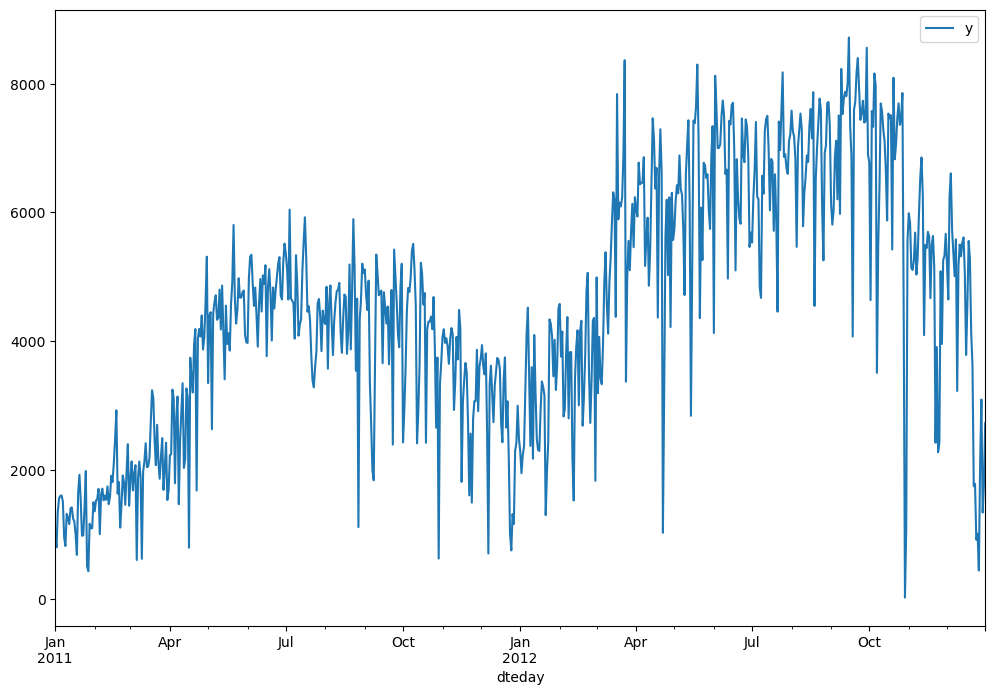

In [13]:
#Visualization
# podemos ver cierta estacionalidad (lo cual es algo que esperariamos en el alquiler de bicicletas), tambien podemos ver cierta tendencia creciente y el valor promedio aumenta con el tiempo.
# Otra cosa que podemos apreciar es la oscilacion tan grande en ciertos dias ej: de 4k a 8k
dataset["y"].plot(figsize = (12,8), legend = True)

# Descomposicion en Tendencia, estacional y errores

In [14]:
# libreias
from statsmodels.tsa.seasonal import seasonal_decompose

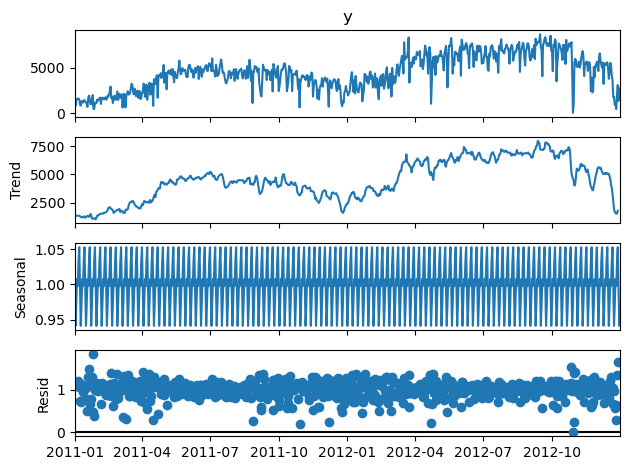

In [15]:
# Descomposición
descomposicion = seasonal_decompose(x = dataset.y,
                                    model = 'multiplicative')
descomposicion.plot();

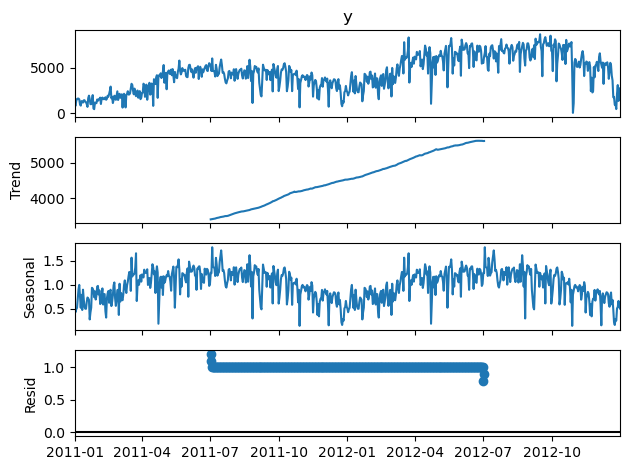

In [16]:
descomposicion = seasonal_decompose(x = dataset.y,
                                    model = 'multiplicative',
                                    period = 365)
descomposicion.plot();

Conceptos claves
* Si no hay patrones, no usar modelos de prevision
* Los modelos de prevision funcionan mejor con estancionalidades y tendencias consitentes

tendecias
* Depende de las companias

Estacionalidad
* Depende de la indutria

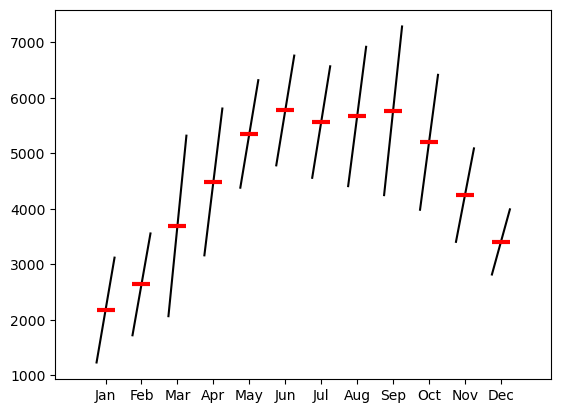

In [17]:
# Gráficos de estacionalidad
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(dataset.y.resample(rule ='MS').mean());

vemos que para diciembre hay menos cantidad de volatilidad, puede deberse a que es invierno y la gente no alquila bicicletas

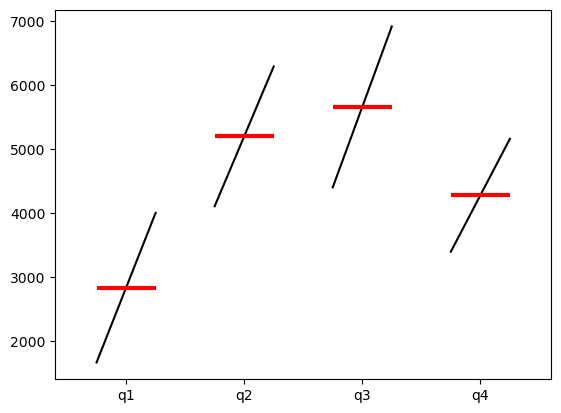

In [18]:
quarter_plot(dataset.y.resample(rule ='Q').mean());

Aqui podemos observar que para el tercer trimestre, se observa la mayor volatilidad. El tercer trimestre representa el verano en el emisferio norte.

# CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [30]:
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-01,5191,0,0,2,0.298333,0.316904,0.806667,0.059704


# FORECASTING MODEL

In [23]:
# Librerias
from tbats import TBATS

In [25]:
# tbats model 
# tbats no permite regresores

model = TBATS(use_trend=True,
              seasonal_periods = [7, 365.5])
model = model.fit(training_set['y'])

# Es realmente simple, y esto se debe a que la optimizacion esta dentro de los procesos matematicos.

In [26]:
# Predictions
predictions_tbats = model.forecast (steps = len(test_set))
predictions_tbats

array([4828.2722494 , 4482.06441435, 4362.51396094, 4305.123489  ,
       4260.33832753, 4217.32149257, 4174.36372802, 4131.34239966,
       4088.29403304, 4045.23847949, 4002.18150899, 3959.12434942,
       3916.0671869 , 3873.01003246, 3829.95288124, 3786.89573084,
       3743.8385806 , 3700.78143038, 3657.72428017, 3614.66712995,
       3571.60997973, 3528.55282951, 3485.49567929, 3442.43852907,
       3399.38137885, 3356.32422863, 3313.26707841, 3270.20992819,
       3227.15277797, 3184.09562775, 3141.03847753])

In [27]:
# Transformar este array a serie
predictions_tbats = pd.Series(model.forecast (steps = len(test_set)))
predictions_tbats.head()

0    4828.272249
1    4482.064414
2    4362.513961
3    4305.123489
4    4260.338328
dtype: float64

In [28]:
# Y ahora una par de cosas.
# Primero, la serie no tiene nombre
predictions_tbats = pd.Series(model.forecast (steps = len(test_set))).rename("TBATS")
predictions_tbats.head()

0    4828.272249
1    4482.064414
2    4362.513961
3    4305.123489
4    4260.338328
Name: TBATS, dtype: float64

In [35]:
# y la segunda es agregarle el indice
predictions_tbats = pd.Series(model.forecast (steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index #pedimos prestado el indice al conjunto test_set
predictions_tbats.head()

dteday
2012-12-01    4828.272249
2012-12-02    4482.064414
2012-12-03    4362.513961
2012-12-04    4305.123489
2012-12-05    4260.338328
Name: TBATS, dtype: float64

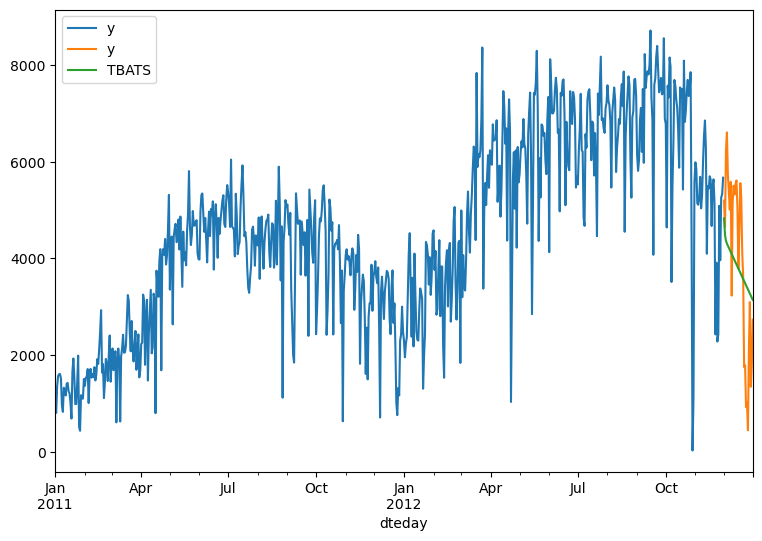

In [39]:
# visualization
training_set['y'].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_tbats.plot(legend = True);

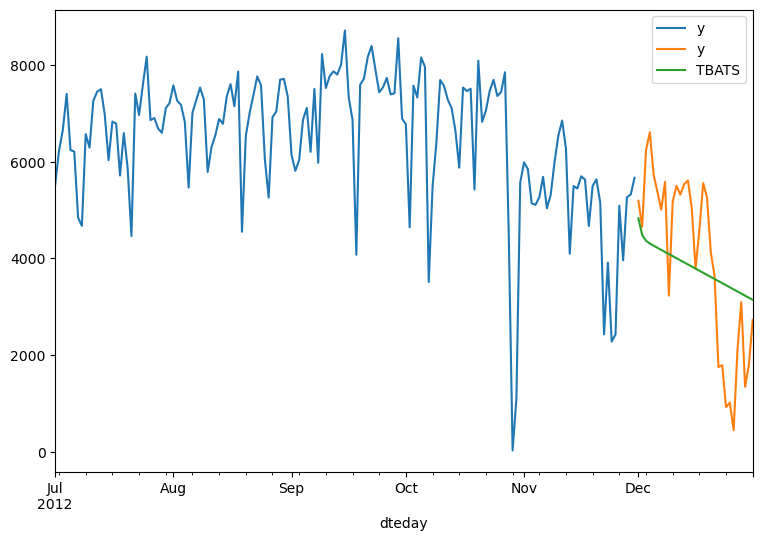

In [40]:
# visualization para los ultimos 6 meses
training_set['y']['2012-07-01':].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_tbats.plot(legend = True);

Lo único que me parece bastante frustrante es que no estamos teniendo ningún tipo de estacionalidad.

Lo cual parece un poco extraño, pero también tiene la intención de ser o decir que cuando se trata

A estas fluctuaciones (las pasadas), la estacionalidad per se no está claramente definida.

# MODEL ASSESSMENT

In [41]:
# MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(round (mean_absolute_error(test_set['y'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_tbats)), 0))

1299.0
1494.0


In [42]:
# MAPE function
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tbats)

68.06406403722943

# EXPORTAR PRONOSTICOS

In [43]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python

C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python


In [44]:
predictions_tbats.to_csv('predictions_tbats.csv', index=True)